# 行列

行列はベクトルを集めたもの

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
$$


$$
% 太字のalias
\newcommand{\b}[1]{\boldsymbol{#1}}
%
\DeclareMathOperator{\Ker}{\text{Ker}}
\DeclareMathOperator{\Im}{\text{Im}}
\DeclareMathOperator{\dim}{\text{dim}}
\DeclareMathOperator{\rank}{\text{rank}}
%
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

## 行列積

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}, \
B =
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
$$

とすると、行列積（matrix multiplication）は

$$
A B = 
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
=
\begin{pmatrix}
    a_{11} b_{11} + a_{12} b_{21} & a_{11} b_{12} + a_{12} b_{22} \\
    a_{21} b_{11} + a_{22} b_{21} & a_{21} b_{12} + a_{22} b_{22}
\end{pmatrix}
$$

### ベクトルの直積との関係

2つのベクトル$\boldsymbol{a}, \boldsymbol{b}$のテンソル積

$$
\boldsymbol{a} \circ \boldsymbol{b}
= \boldsymbol{a} \otimes \boldsymbol{b}
= \boldsymbol{a} \boldsymbol{b}^T
= \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix}
\begin{pmatrix}
b_1 & b_2 & \cdots & b_n
\end{pmatrix}
= \begin{pmatrix}
    a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n\\
    a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n\\
    \vdots  & \vdots  & \ddots & \vdots \\
    a_n b_1 & a_n b_2 & \cdots & a_n b_n
\end{pmatrix}
$$

を**直積**（direct product）あるいは**外積**（outer product）という。

:::{card} 行列積と直積の関係

行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
A^T B = \sum^n_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
$$

が成り立つ。この形式は計量経済学（回帰分析）の漸近正規性の証明などで多用される。
:::

（例）$A, B \in \mathbb{R}^{2\times 2}$のとき、

$$
\begin{align}
A^T B &= 
\begin{pmatrix}
    a_{11} & a_{21}\\
    a_{12} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
\\
&= 
\begin{pmatrix}
   a_{11} b_{11} + a_{21} b_{21} & a_{11} b_{12} + a_{21} b_{22}\\
   a_{12} b_{11} + a_{22} b_{21} & a_{12} b_{12} + a_{22} b_{22}\\
\end{pmatrix}
\end{align}
$$

であり、

$$
a_1
= \begin{pmatrix}
    a_{11} \\
    a_{12} 
\end{pmatrix}
, \hspace{1em}
b_1^T = 
\begin{pmatrix}
    b_{11} & b_{12}\\
\end{pmatrix}
$$

から

$$
\begin{align}
\sum^2_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
&= \begin{pmatrix}
    a_{11} \\
    a_{12}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} \\
    a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{21} & b_{22}
\end{pmatrix}
\\
&= \begin{pmatrix}
    a_{11} b_{11} & a_{11} b_{12}\\
    a_{12} b_{11} & a_{12} b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} b_{21} & a_{21} b_{22}\\
    a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}
\end{align}
$$

であるため。

:::{card} 行列積との関係

行列の一部をベクトルで表して（＝ブロック行列）、通常の行列積の定義をベクトルの積の形で表すこともできる

$n$次元正方行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
\begin{align}
BA &= 
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \\
    \boldsymbol{b}_{2}^T \\
    \vdots \\
    \boldsymbol{b}_{n}^T
\end{pmatrix}
\begin{pmatrix}
    \boldsymbol{a}_1, \boldsymbol{a}_2, \cdots, \boldsymbol{a}_n
\end{pmatrix}
=
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \boldsymbol{a}_1 & \boldsymbol{b}_{1}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{1}^T \boldsymbol{a}_n\\
    \boldsymbol{b}_{2}^T \boldsymbol{a}_1 & \boldsymbol{b}_{2}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{2}^T \boldsymbol{a}_n\\
    \vdots & \vdots & & \vdots\\
    \boldsymbol{b}_{n}^T \boldsymbol{a}_1 & \boldsymbol{b}_{n}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{n}^T \boldsymbol{a}_n\\
\end{pmatrix}
\end{align}
$$
:::

In [14]:
import numpy as np

A = np.array([
    [1, 2],
    [3, 4],
])

In [16]:
(A.T @ A).T

array([[10, 14],
       [14, 20]])

## 行列と写像

> 行列は写像である
>
> （平岡和幸, & 堀玄. (2004). プログラミングのための線形代数. 株式会社 オーム社.）

例：ベクトル$x$に行列$A$を掛けて$y$とする

$$
y = A x
$$

$x$を$y$に写す写像（≒関数）が行列$A$


連立一次方程式を行列で表すこともできる。

$$
\begin{cases}
\begin{align}
a_{11} x_1 + a_{12} x_2 + &\cdots + a_{1m} x_m = y_1\\
a_{21} x_1 + a_{22} x_2 + &\cdots + a_{2m} x_m = y_2\\
&\vdots\\
a_{n1} x_1 + a_{n2} x_2 + &\cdots + a_{nm} x_m = y_n\\
\end{align}
\end{cases}
$$

のような連立一次方程式は、

$$
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1m} \\
a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{pmatrix}
, \hspace{1em}
\b{x} = \begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_m
\end{pmatrix}
, \hspace{1em}
\b{y} = \begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$$

を用いて

$$
A\b{x} = \b{y}
$$

と表すことができる。

## 行列式

正方行列$A$に対して、その**行列式**（determinant）を$|A|$や$\det(A)$と表す。行列式はスカラーである。

2次の正方行列に対して、行列式は次のように求めることができる。

$$
A = 
\begin{pmatrix}
a & b\\
a' & b'
\end{pmatrix}
= (\b{a}, \b{b})
\\
\Rightarrow
|A|
= |\b{a}, \b{b}|
= ab' - a'b
$$


In [2]:
import numpy as np

A = np.array([
    [1, 2],
    [3, 4],
])

det = 1 * 4 - 2 * 3
det

-2

In [3]:
np.linalg.det(A)

-2.0000000000000004

きちんとした定義は次のようになる

:::{admonition} （定義）行列式

次の4つの条件を満たす$A$の列ベクトルの関数$\det(\b{a}_1, \b{a}_2, \cdots, \b{a}_d)$を$A$の行列式と呼ぶ。

(1) 各列ベクトルについて線形である

(2) 2つの列ベクトルが同じならゼロになる

(2') 2つの列ベクトルを入れ替えると符号が変わる

(3) $\det(I) = \det(\b{e}_1, \cdots, \b{e}_d) = 1$ （$\b{e}_1, \cdots, \b{e}_d$は基本ベクトル）


### 行列式の幾何的な解釈＝体積拡大率

2つのベクトルが四角形を表すとみなす。この四角形を変形させる行列$A$があったとき、変換後の四角形の面積はもとの面積の$\text{det}(A)$倍である、と解釈できる（行列式の値が正の値のとき。負の場合は軸が反転して裏返しになる。$\text{det}(A)=0$ならぺちゃんこに潰れている状態）

例えば$I \in \mathbb{R}^{2\times 2}$が構成する四角形に$A$を乗じて$AI=A$とするときの拡大率ともいえるし、$A$の面積とも言える

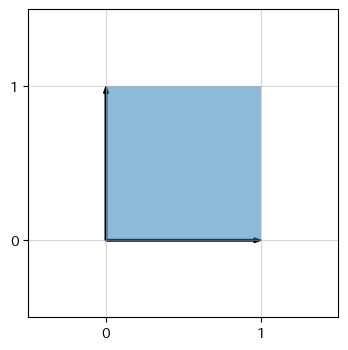

In [4]:
e0 = [1, 0]
e1 = [0, 1]

I = np.array([e0, e1])
O = np.array([0, 0])

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(True, alpha=.5)
ax.arrow(*O, *e0, width=0.01, color="black", length_includes_head=True)
ax.arrow(*O, *e1, width=0.01, color="black", length_includes_head=True)
ax.fill_between(x=[0, 1], y1=0, y2=1, alpha=.5)

ax.set(xlim=[-0.5, 1.5], ylim=[-0.5, 1.5], xticks=[0, 1], yticks=[0, 1])
fig.show()

適当な行列$A$で変換するとこうなる

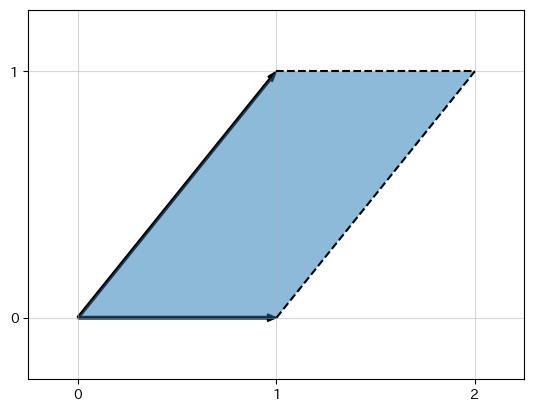

In [5]:
A = np.array([
    [1, 1],
    [0, 1]
])
e0_ = A @ e0
e1_ = A @ e1
y_ = e0_ + e1_

fig, ax = plt.subplots()
ax.grid(True, alpha=.5)
ax.arrow(0, 0, *e0_, width=0.01, color="black", length_includes_head=True)
ax.arrow(0, 0, *e1_, width=0.01, color="black", length_includes_head=True)

d = np.array([e0_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
d = np.array([e1_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

x = np.linspace(0, y_[0], 11)
ax.fill_between(x=x, y1=[max(e - 1, 0) for e in x], y2=[min(e, 1) for e in x], alpha=.5)
ax.set(xlim=[-0.25, 2.25], ylim=[-0.25, 1.25], xticks=[0, 1, 2], yticks=[0, 1])
fig.show()

平行四辺形の面積は底辺×高さ。今回は底辺も高さも1なので、面積は変わっていない。

この行列$A$の行列式は1になる

In [6]:
np.linalg.det(A)

1.0

参考：[Chapter 6 行列式 | 線形代数のエッセンス - YouTube](https://www.youtube.com/watch?v=K8axNorb1CU)

#### （例）次のような行列の場合は…？

$$
A = 
\begin{pmatrix}
1 & 2\\
1 & 3
\end{pmatrix}
, \hspace{2em}
B = 
\begin{pmatrix}
1 & 102\\
1 & 103
\end{pmatrix}
\\
\text{det}(A) = 3 - 2 = 1
, \hspace{2em}
\text{det}(B) = 103 - 102 = 1
$$


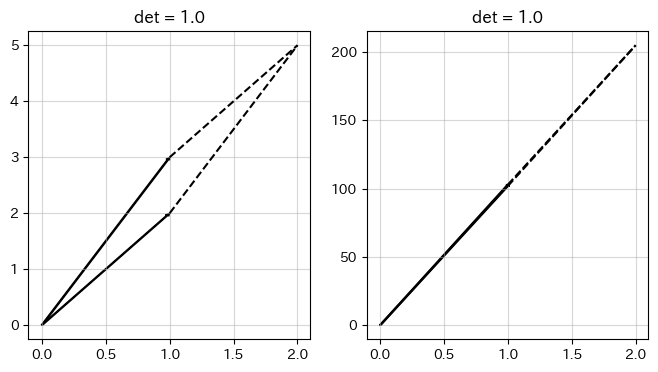

In [7]:
A = np.array([
    [1, 2],
    [1, 3]
])
B = np.array([
    [1, 102],
    [1, 103]
])
fig, axes = plt.subplots(ncols=2, figsize=[8, 4])

for X, ax in zip([A, B], axes):
    x0_ = X[0]
    x1_ = X[1]
    y_ = x0_ + x1_
    ax.grid(True, alpha=.5)
    ax.arrow(0, 0, *x0_, width=0.01, color="black", length_includes_head=True)
    ax.arrow(0, 0, *x1_, width=0.01, color="black", length_includes_head=True)

    d = np.array([x0_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
    d = np.array([x1_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

    x = np.linspace(0, y_[0], 11)
    ax.set(title=f"det = {np.linalg.det(X)}")
fig.show()

### 多重線形性

行列$A=(a_1, \cdots, a_n)$について

$$
\def\b#1{\boldsymbol{#1}}
\DeclareMathOperator{\det}{\text{det}}
\begin{align}
\det(c \b{a}_1, \b{a}_2, \cdots, \b{a}_n) &= c \det(\b{a}_1, \b{a}_2, \cdots, \b{a}_n)\\
\det(\b{a}_1 + \b{a}_1', \b{a}_2, \cdots, \b{a}_n) &= \det(\b{a}_1, \b{a}_2, \cdots, \b{a}_n) + \det(\b{a}_1', \b{a}_2, \cdots, \b{a}_n)\\
\det(c\b{A}) = c^n \det(\b{A})
\end{align}
$$

のように任意の列への線形和が全体への線形和と等しいような法則性があること

In [8]:
A = np.array([
    [1, 2],
    [1, 3]
])
print(f"det(A) = {np.linalg.det(A)}")

c = 5
print(f"det(cA) = {np.linalg.det(c * A):.1f}")
print(f"det(cA) - c^n det(A) = {np.linalg.det(c * A) - c**A.shape[0] * np.linalg.det(A):.1f}")

det(A) = 1.0
det(cA) = 25.0
det(cA) - c^n det(A) = -0.0


In [9]:
A[:, 0] *= c
A

array([[5, 2],
       [5, 3]])

In [10]:
np.linalg.det(A)

4.999999999999999

## 逆行列

正方行列$A$に対し、

$$
AA^{-1} = A^{-1} A = I
$$

が成立する正方行列$A^{-1}$が存在するとき、$A^{-1}$を$A$の**逆行列**という。（$I$は$A$と同じサイズの単位行列）

逆行列が存在する行列のことを**正則行列（regular matrix）**や**可逆行列（invertible matrix）**という。

正則でない行列は**特異行列（singular matrix）**という

### 逆行列の効率的な計算

#### 行列分解で計算する方法

- https://speakerdeck.com/nagiss/hiyurisuteitukukontesutodeji-jie-xue-xi-siyou?slide=26

#### 共役勾配法

**共役勾配（conjugate gradient: CG）法**は逆行列の計算を二次最適化に落とし込む方法としても使われる


## 行列の計算規則

### 行列の和

$$
A(B+C) = AB + AC
$$

In [11]:
import numpy as np
A = np.array([
    [1, 0],
    [0, 0]
])
B = np.array([
    [2, 0],
    [0, 3]
])
C = np.array([
    [0, -1],
    [-1, 0]
])

In [12]:
A @ (B + C)

array([[ 2, -1],
       [ 0,  0]])

In [13]:
A @ B + A @ C

array([[ 2, -1],
       [ 0,  0]])

### べき乗

$$
\begin{align}
AA &= A^2\\
AAA &= A^3
\end{align}
$$

$$
\begin{align}
A^{n+m} &= A^n + A^m\\
(A^n)^m &= A^{nm}
\end{align}
$$


:::{adomonition} 例

$$
A =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\hspace{1em}
A^2 = 
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
= 
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
$$


$$
B =
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
\hspace{1em}
B^2 = 
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
= 
\begin{pmatrix}
4 & 0\\
0 & 9
\end{pmatrix}
$$
:::

#### 普通の数取は異なる計算規則

$$
\begin{align}
(A + B)^2 &= A^2 + AB + BA + B^2\\
(A + B) (A - B) &= A^2 - AB + BA - B^2\\
(AB)^2 &= ABAB
\end{align}
$$


:::{adomonition} 例

$$
A =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\hspace{1em}
B =
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
$$

$$
\begin{align}
AB &=
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
=
\begin{pmatrix}
2 & 0\\
0 & 0
\end{pmatrix}
\\
(AB)^2 &= 
\begin{pmatrix}
4 & 0\\
0 & 0
\end{pmatrix}
\end{align}
$$
:::

### 逆行列

$$
(A^{-1})^{-1} = A
$$


$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
(A^k)^{-1} = (A^{-1})^k
$$

### 左右を入れ替えなければどこにカッコをつけてもおなじ

例えばベクトル$\boldsymbol{x} = (x_1, x_2, \dots, x_n)$について、$\boldsymbol{x} \boldsymbol{x}^T \boldsymbol{x}$は$(\boldsymbol{x} \boldsymbol{x}^T) \boldsymbol{x}$と捉えるより$\boldsymbol{x} (\boldsymbol{x}^T \boldsymbol{x})$としたほうが楽

$$
(\boldsymbol{x} \boldsymbol{x}^T) \boldsymbol{x}
= 
\begin{pmatrix}
x_1^2 & x_1 x_2 & \cdots & x_1 x_n\\
x_2 x_1 & x_2^2 & \cdots & x_2 x_n\\
\vdots & \vdots & & \vdots\\
x_n x_1 & x_n x_2 & \cdots & x_n^2
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
= 
\begin{pmatrix}
x_1^2 \cdot x_1 + x_1 x_2 \cdot x_2 + \cdots + x_1 x_n \cdot x_n\\
x_2 x_1 \cdot x_1 + x_2^2 \cdot x_2 + \cdots + x_2 x_n \cdot x_n\\
\vdots\\
x_n x_1 \cdot x_1 + x_n x_2 \cdot x_2 + \cdots + x_n^2 \cdot x_n
\end{pmatrix}
=
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
\sum^n_{i=1} x_i^2
$$

$$
\boldsymbol{x} (\boldsymbol{x}^T \boldsymbol{x})
= 
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
\sum^n_{i=1} x_i^2
$$

## 行列の転置

:::{admonition} 行列の転置の性質

1. $(A^T)^T = A$
2. $(cA + dB)^T = cA^T + dB^T$
3. $(AB)^T = B^T A^T$
4. $(A^T)^{-1} = (A^{-1})^T$
5. $|A^T| = |A|$

:::

### 対称行列

$$
A^T = A
$$

を満たす正方行列$A$を**対称行列**（symmetric matrix）という

## 可換

$AB = BA$が成り立つとき、$A$と$B$は**可換**であるという

In [13]:
import numpy as np

A = np.array([
    [1, 0],
    [0, 1]
])
B = np.array([
    [1, 1],
    [1, 1]
])

(A @ B == B @ A).all()

True

## ブロック行列

行列をいくつかのブロック（小行列）に分けて扱うことがある

$$
A=\left(\begin{array}{ccccc}
1 & 2 & 3 & \vdots & 4 \\
5 & 6 & 7 & \vdots & 8 \\
\ldots & \ldots & \ldots & \ldots & \ldots\\
9 & 10 & 11 & \vdots & 12
\end{array}\right)=\left(\begin{array}{ll}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{array}\right)
$$

特に行ベクトルや列ベクトルに分けると扱いやすい

$$
A B=\left(\begin{array}{c}
\boldsymbol{a}_1 \\
\boldsymbol{a}_2 \\
\vdots \\
\boldsymbol{a}_m
\end{array}\right)\left(\begin{array}{lll}
\boldsymbol{b}_1^{\prime} & \cdots & \boldsymbol{b}_l{ }^{\prime}
\end{array}\right)=\left(\begin{array}{cccc}
\boldsymbol{a}_1 \boldsymbol{b}_1^{\prime} & \boldsymbol{a}_1 \boldsymbol{b}_2^{\prime} & \cdots & \boldsymbol{a}_1 \boldsymbol{b}_\iota{ }^{\prime} \\
\boldsymbol{a}_2 \boldsymbol{b}_1^{\prime} & \boldsymbol{a}_2 \boldsymbol{b}_2^{\prime} & \cdots & \boldsymbol{a}_2 \boldsymbol{b}_l{ }^{\prime} \\
\vdots & \vdots & & \vdots \\
\boldsymbol{a}_m \boldsymbol{b}_1^{\prime} & \boldsymbol{a}_m \boldsymbol{b}_2^{\prime} & \cdots & \boldsymbol{a}_m \boldsymbol{b}_l{ }^{\prime}
\end{array}\right)
$$

$$
A B=\left(\begin{array}{c}
\boldsymbol{a}_1 \\
\boldsymbol{a}_2 \\
\vdots \\
\boldsymbol{a}_m
\end{array}\right) B=\left(\begin{array}{c}
\boldsymbol{a}_1 B \\
\boldsymbol{a}_2 B \\
\vdots \\
\boldsymbol{a}_m B
\end{array}\right)
$$

$$
A B=A\left(\begin{array}{llll}
\boldsymbol{b}_1{ }^{\prime} & \boldsymbol{b}_2{ }^{\prime} & \cdots & \boldsymbol{b}_l{ }^{\prime}
\end{array}\right)=\left(\begin{array}{llll}
A \boldsymbol{b}_1{ }^{\prime} & A \boldsymbol{b}_2{ }^{\prime} & \cdots & A \boldsymbol{b}_l{ }^{\prime}
\end{array}\right)
$$

$$
A B=\left(\begin{array}{llll}
\boldsymbol{a}_1^{\prime} & \boldsymbol{a}_2^{\prime} & \cdots & \boldsymbol{a}_n{ }^{\prime}
\end{array}\right)\left(\begin{array}{c}
\boldsymbol{b}_1 \\
\boldsymbol{b}_2 \\
\vdots \\
\boldsymbol{b}_n
\end{array}\right)=\left(\boldsymbol{a}_1^{\prime} \boldsymbol{b}_1+\boldsymbol{a}_2^{\prime} \boldsymbol{b}_2+\cdots+\boldsymbol{a}_n{ }^{\prime} \boldsymbol{b}_n\right)
$$

零行列があるブロック行列の積は、対角要素に相当する小行列の計算が簡単になる

$A_1, B_1$が$m$次正方行列、$A_2, B_2$が$n$次正方行列のとき、

$$
\begin{aligned}
\left(\begin{array}{ll}
A_1 & O \\
O & A_2
\end{array}\right)\left(\begin{array}{ll}
B_1 & O \\
O & B_2
\end{array}\right) & =\left(\begin{array}{cc}
A_1 B_1 & O \\
O & A_2 B_2
\end{array}\right)
\\
\left(\begin{array}{ll}
A_1 & O \\
* & A_2
\end{array}\right)\left(\begin{array}{ll}
B_1 & O \\
* & B_2
\end{array}\right) & =\left(\begin{array}{cc}
A_1 B_1 & O \\
*' & A_2 B_2
\end{array}\right)
\\
\left(\begin{array}{cc}
A_1 & * \\
O & A_2
\end{array}\right)\left(\begin{array}{ll}
B_1 & * \\
O & B_2
\end{array}\right) & =\left(\begin{array}{cc}
A_1 B_1 & *' \\
O & A_2 B_2
\end{array}\right)
\end{aligned}
$$

ここで左辺の$*$はブロックのサイズが合えばなんでもよいことを意味し、右辺の$*'$はそのサイズのある定まった行列を表す（左辺と右辺で$*$の部分が等しいわけではない）

In [1]:
import numpy as np
np.array([
    [1, 2, 1, 0],
    [3, 4, 0, 1],
    [0, 0, 3, 1],
    [0, 0, 5, 1]
]) @ np.array([
    [1, 1, 1, 0],
    [2, 3, 0, 1],
    [0, 0, 2, 0],
    [0, 0, 0, 1]
])

array([[ 5,  7,  3,  2],
       [11, 15,  3,  5],
       [ 0,  0,  6,  1],
       [ 0,  0, 10,  1]])

In [2]:
np.array([
    [1, 2],
    [3, 4],
]) @ np.array([
    [1, 1],
    [2, 3],
])

array([[ 5,  7],
       [11, 15]])

例：

$$
M = 
\begin{pmatrix}
I & A\\
O & I
\end{pmatrix}
$$

という行列があるとき、

$$
M^2 =
\begin{pmatrix}
I & A'\\
O & I
\end{pmatrix}
$$

この$A'$の部分は$A^2$ではなく$2A$

In [12]:
import numpy as np
M = np.array([
    [1, 0, 1, 2],
    [0, 1, 3, 4],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

M @ M

array([[1, 0, 2, 4],
       [0, 1, 6, 8],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [10]:
# A^2
A = np.array([
    [1, 2],
    [3, 4],
])
A @ A

array([[ 7, 10],
       [15, 22]])

In [11]:
2 * A

array([[2, 4],
       [6, 8]])

In [18]:
import numpy as np
M = np.array([
    [1, 0, 1, 2],
    [0, 1, 3, 4],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

M @ M @ M

array([[ 1,  0,  3,  6],
       [ 0,  1,  9, 12],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

In [15]:
import numpy as np
M = np.array([
    [1, 0, 0, 1, 2, 3],
    [0, 1, 0, 4, 5, 6],
    [0, 0, 1, 7, 8, 9],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

M @ M

array([[ 1,  0,  0,  2,  4,  6],
       [ 0,  1,  0,  8, 10, 12],
       [ 0,  0,  1, 14, 16, 18],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1]])